In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
from pylib.utils.functions_for_regression import lin_data, plot_scatter
import matplotlib.pyplot as plt
import numpy as np

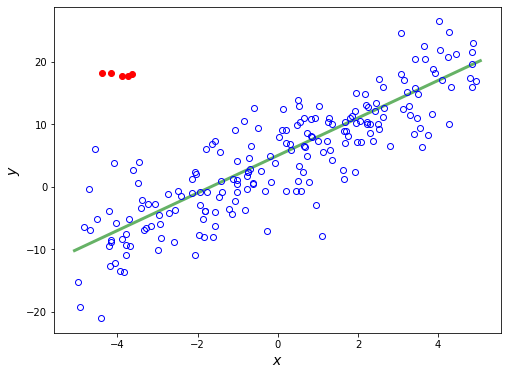

In [3]:
X, y, _, f_truth, outliers = lin_data(200, has_outlier=True)
plt.figure(figsize=(8, 6))
plot_scatter(X, y, f=f_truth)
plt.scatter(outliers[:, 0], outliers[:, 1], color='r')
plt.show()

In [4]:
X_ol = np.r_[X, outliers[:, 0].reshape(-1, 1)]
y_ol = np.r_[y, outliers[:, 1]]

## Huber鲁棒回归

In [5]:
from pylib.utils.functions_for_regression import plot_fitted_line
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [6]:
hr = HuberRegressor()
hr.fit(X_ol, y_ol)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [7]:
y_pred = hr.predict(X)
mse = mean_squared_error(y, y_pred)
print("样本误差：{:.3f}".format(mse))

样本误差：22.690


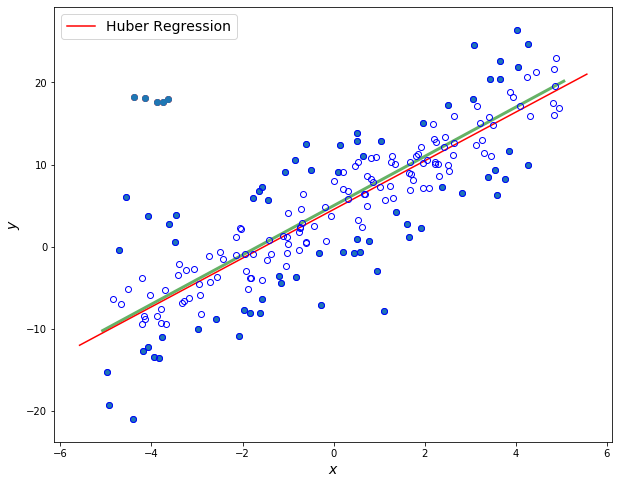

In [8]:
plt.figure(figsize=(10, 8))
plot_scatter(X, y, f=f_truth)
plt.scatter(outliers[:, 0], outliers[:, 1], color='r')
plt.scatter(X_ol[hr.outliers_], y_ol[hr.outliers_])
plot_fitted_line(hr, "Huber Regression", "r")
plt.legend(fontsize=14)
plt.show()

### 对比线性回归

In [9]:
lr = LinearRegression()
lr.fit(X_ol, y_ol)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = lr.predict(X_ol)
mse = mean_squared_error(y_ol, y_pred)
print("样本误差：{:.3f}".format(mse))

样本误差：36.663


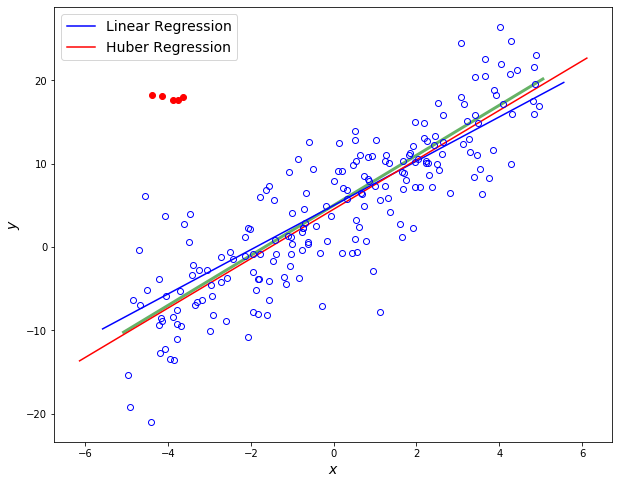

In [11]:
plt.figure(figsize=(10, 8))
plot_scatter(X, y, f=f_truth)
plt.scatter(outliers[:, 0], outliers[:, 1], color='r')
plot_fitted_line(lr, "Linear Regression", "b")
plot_fitted_line(hr, "Huber Regression", "r")
plt.legend(fontsize=14)
plt.show()

### Huber损失函数

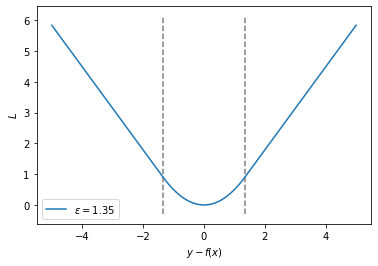

In [12]:
epsilon = hr.epsilon
r = np.linspace(-5, 5, 100)
loss = np.where(abs(r) < epsilon, 0.5 * r**2 , epsilon * abs(r) - epsilon**2 / 2)
plt.plot(r, loss, label="$\epsilon={}$".format(epsilon))
ylim_min = plt.ylim()[0]
ylim_max = plt.ylim()[1]
plt.vlines(epsilon, ylim_min, ylim_max, linestyles='--', colors='gray')
plt.vlines(-epsilon, ylim_min, ylim_max, linestyles='--', colors='gray' )
plt.xlabel(r"$y-f(x)$")
plt.ylabel(r"$L$")
plt.legend()
plt.show()